***A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)***

`https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/`


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [22]:
# data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/AirPassengers.csv')
data = pd.read_csv('AirPassengers.csv')

In [23]:
print(data.shape)
data.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [25]:
# data['time'] = pd.to_datetime(data['time'], format = "%Y-%m")
# data.head()

In [28]:
## Its not Time series data set, as getting the dtype as object and time as float64
dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                  index_col = 'Month', date_parser = dataparse)

In [29]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [31]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [37]:
## Creating the dummy name for data
ts = data['#Passengers']

In [39]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [40]:
## Select a particular value in TS
## Specific the index as a string constant
ts['1949-01-01']

112

In [41]:
## Import the datetime library and use 'datetime' function
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [43]:
print(ts['1949-01-01': '1949-05-01'])
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [44]:
## All 1949 year data
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

`A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. `

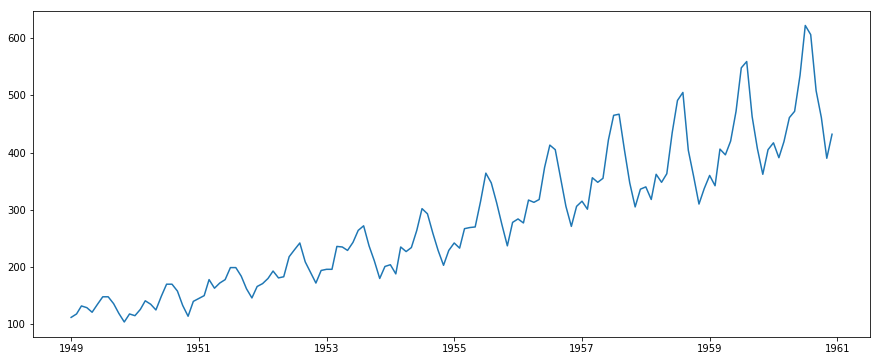

In [45]:
plt.plot(ts)

## Can Check the stationary using the following methods:
   1. **plotting Rolling Statistics** : Examine the moving average or moving variance
   2. **Dickey-Fuller Test**: Check Null Hypothesis based on **Test Statistics** and **Critical Values**

In [69]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

`pd.rolling_mean is deprecated in pandas and will be removed in future. Instead: Using pd.rolling you can do:`

In [117]:
## Function for Testing the stationary

def test_stationarity(timeseries):
    # Determing the Rolling statistics
    
    rolmean = timeseries.rolling(12).mean()
    # pd.core.window.rolling(timeseries, windows = 12).mean()
    rolstd = timeseries.rolling(12).std()
    #pd.core.window.rolling(timeseries, windows = 12).std()
    
    ## Plot Rolling statistics:
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red',  label = 'Rolling Mean')
    std = plt.plot(rolstd, color= 'black', label = 'Rolling Std')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Stanrd Deviation')
    plt.show(block = False)
    
    
    ## Perform Agumented Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observation Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value %Keys)'] = value
    
    print(dfoutput)

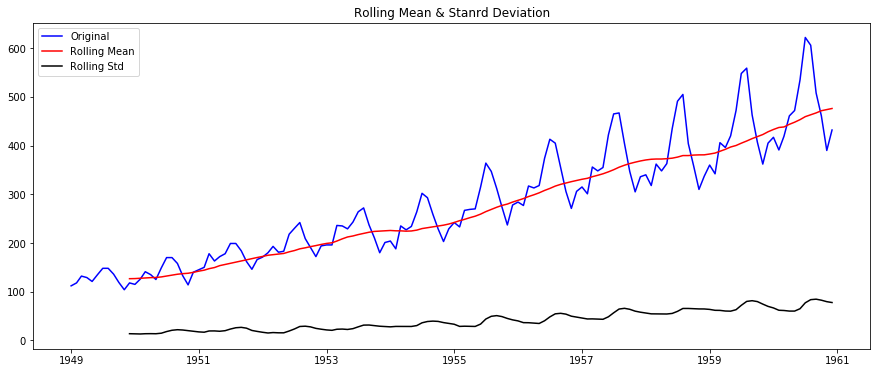

Results of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value %Keys)          -2.578770
dtype: float64


In [118]:
test_stationarity(ts)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the **signed** values should be compared and not the absolute values.

## How to make a Time Series Stationary?

 There are 2 major reasons behind non-stationaruty of a TS:
1. **Trend** – varying mean over time.
2. **Seasonality** – variations at specific time-frames.

### Estimating and Eliminating

**Transformation** as there is a significant *Positive Trend*. So Apply Transformation which penalize higher values more than smaller values.
 **Methods:**
     1. log
     2. Square Root
     3. Cube Root

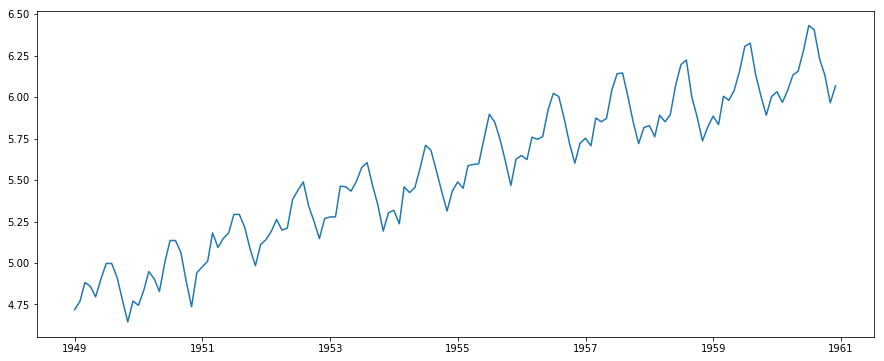

In [106]:
#1.log
ts_log = np.log(ts)
plt.plot(ts_log)

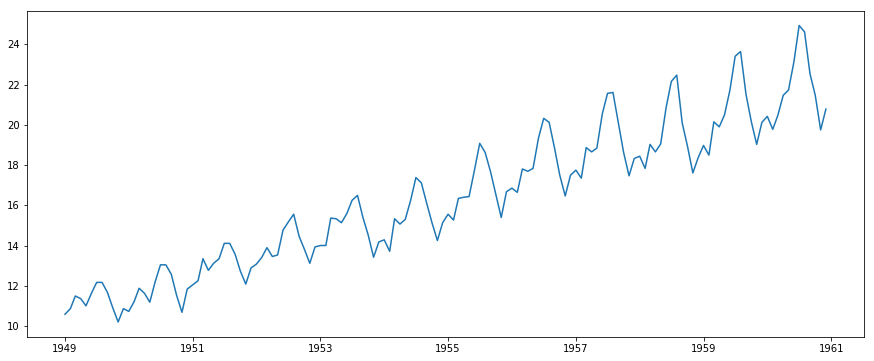

In [107]:
#2. Square Root
ts_sqrt = np.sqrt(ts)
plt.plot(ts_sqrt)

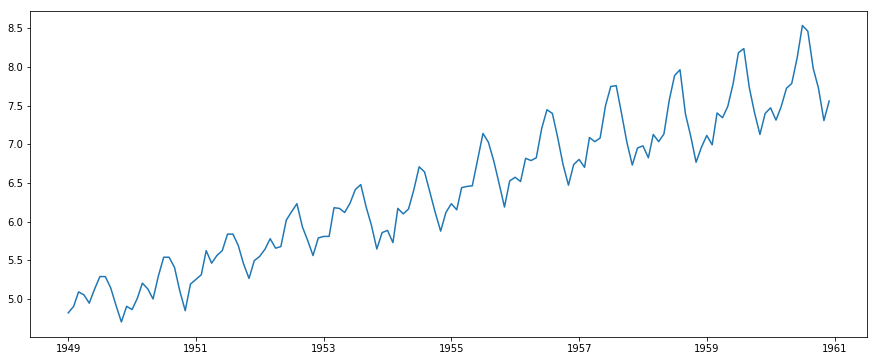

In [109]:
#3 Cube Root
ts_cbrt = np.cbrt(ts)
plt.plot(ts_cbrt)

#### Technique to estimate or model this trend and then remove it from the series.
1. **Aggregation**: taking average for a time period like monthly/weekly averages
2. **Smoothing**: taking rolling averages
3. **Polynomial Fitting**: Fit a regression model

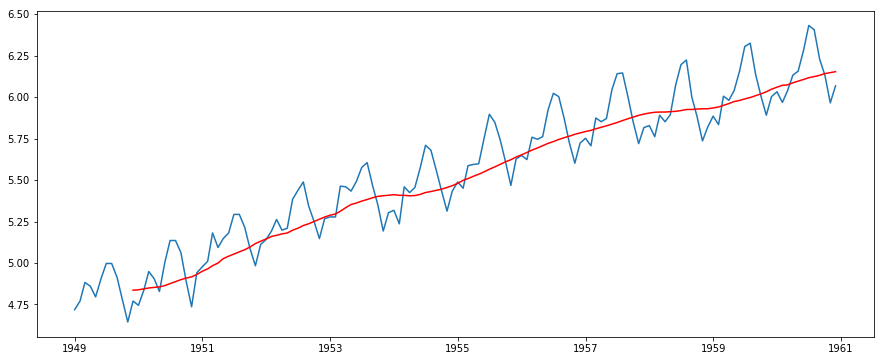

In [119]:
##2. Moving Average (SMOOTHING)
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

In [120]:
# check all the NAN values
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

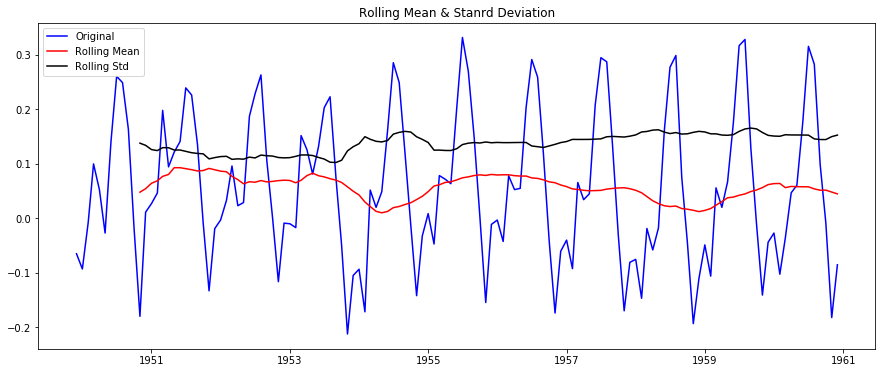

Results of Dickey-Fuller Test:
Test Statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of Observation Used    119.000000
Critical Value %Keys)          -2.579896
dtype: float64


In [121]:
## Remove the all NaN Values and check the plots to test stationarity
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

The **test statistic** is smaller than the 5% **critical** values so we can say with 95% confidence that this is a stationary series.

In Moving average need to define cycle, so EWMA

**Expoenetially Weighted Moving Average**

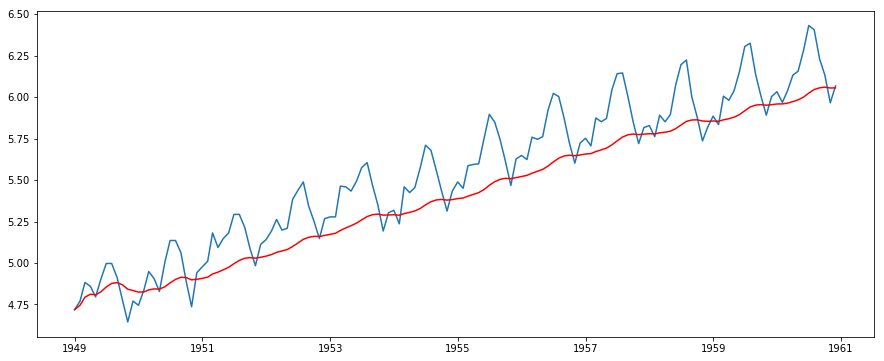

In [142]:
exp_weight_mov_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(exp_weight_mov_avg, color = 'red')

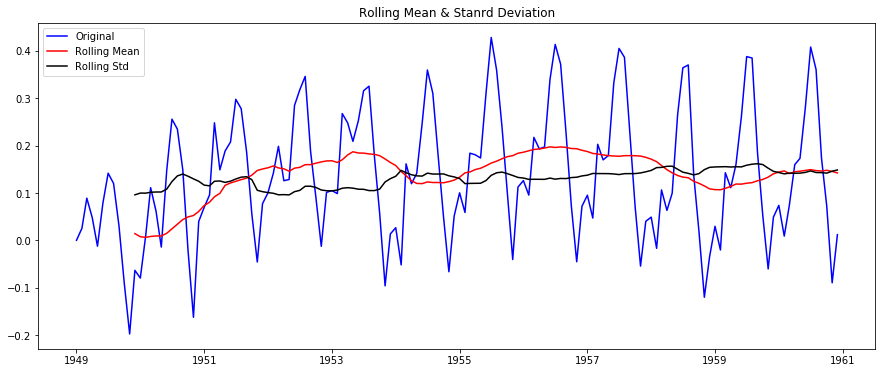

Results of Dickey-Fuller Test:
Test Statistic                 -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value %Keys)          -2.578770
dtype: float64


In [143]:
ts_log_ewma_diff = ts_log - exp_weight_mov_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend  and Seasonality 
The above method won't work for the ** High Seasonality**. 
Others method for removing trend and seasonality
1. **Differencing**
2. **Decomposition**

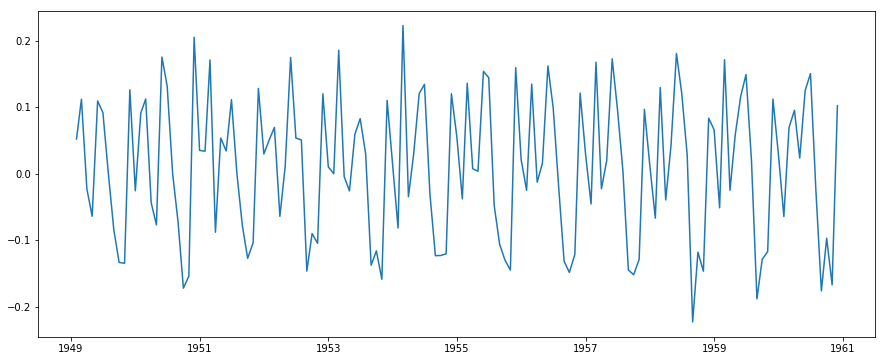

In [152]:
## First order differencing 
ts_log_diff = ts_log - ts_log.shift()  ## periods=2 for 2nd order
plt.plot(ts_log_diff)

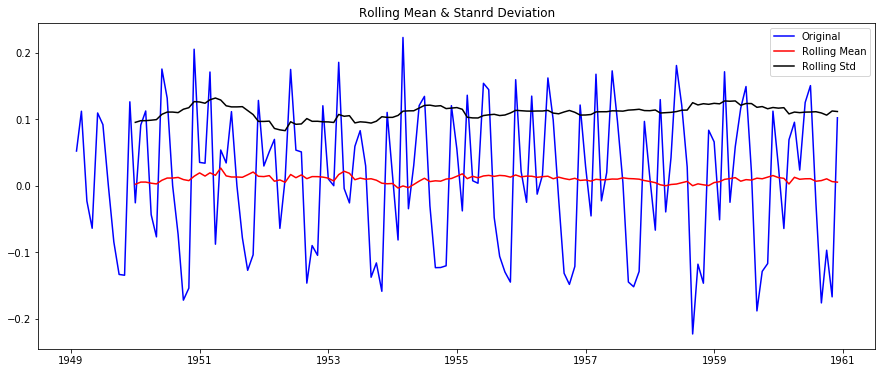

Results of Dickey-Fuller Test:
Test Statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of Observation Used    128.000000
Critical Value %Keys)          -2.578960
dtype: float64


In [153]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

The mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. 

### Decomposing

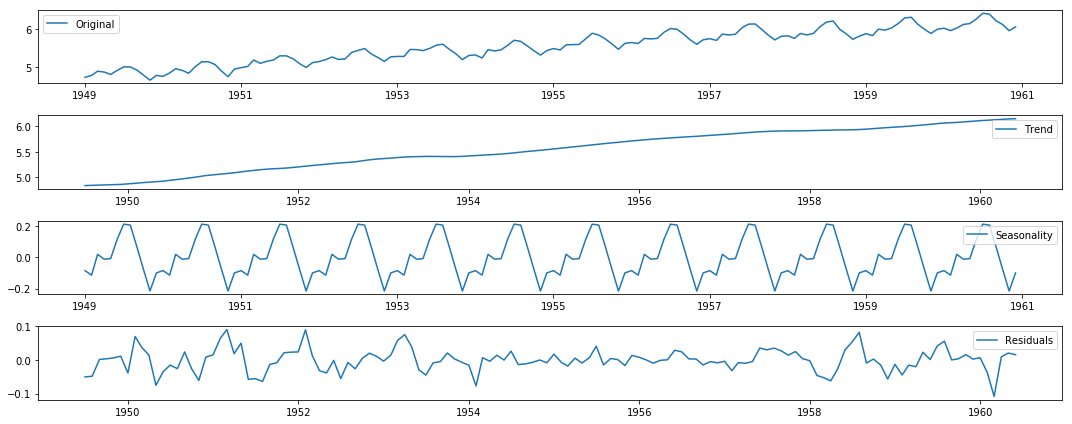

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

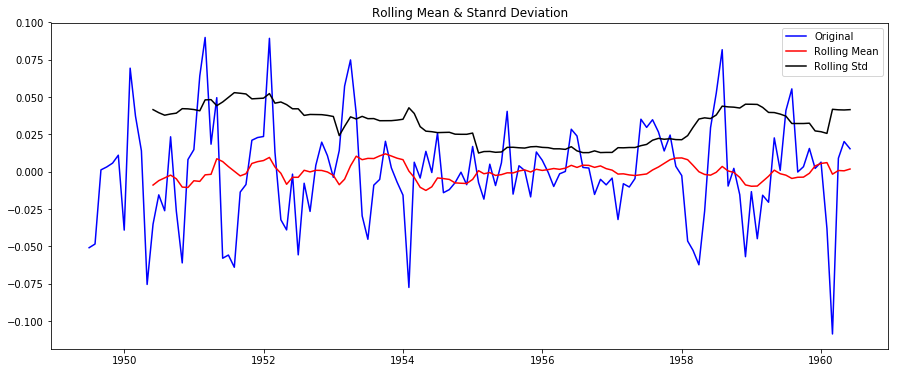

Results of Dickey-Fuller Test:
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of Observation Used    1.220000e+02
Critical Value %Keys)        -2.579569e+00
dtype: float64


In [155]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## Forecasting a Time Series
### ARIMA (  Auto-Regressive Integrated Moving Averages)

In [156]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [157]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

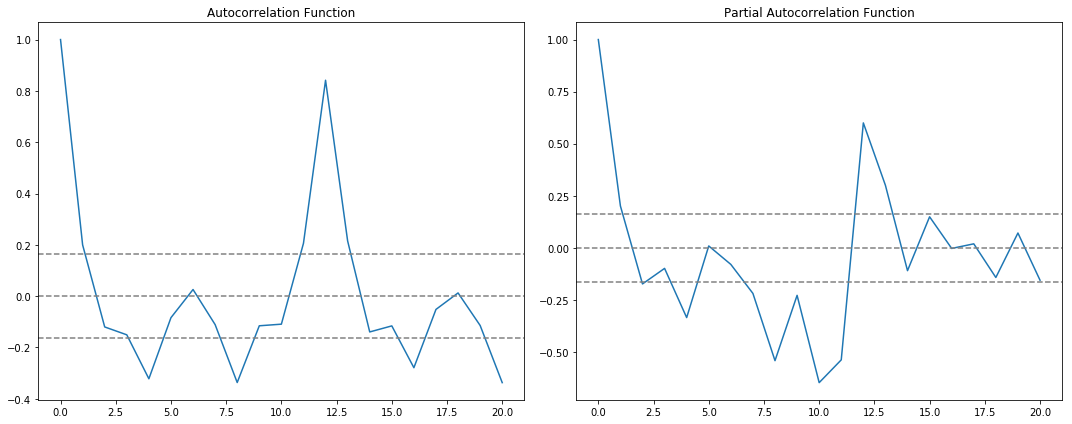

In [160]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [161]:
from statsmodels.tsa.arima_model import ARIMA

## AR Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.5023')

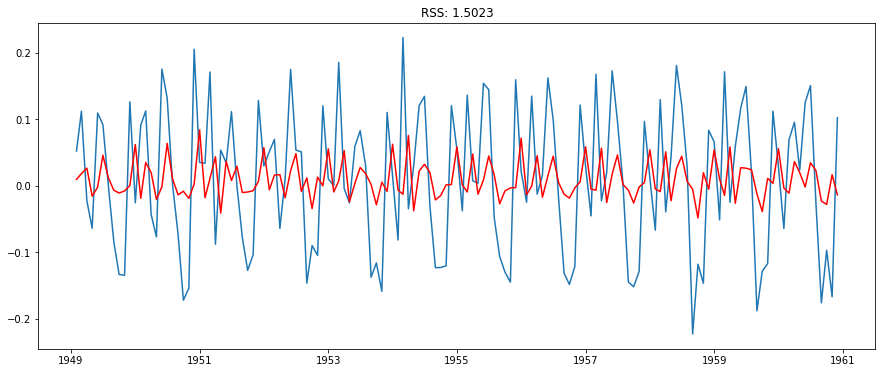

In [162]:
model = ARIMA(ts_log, order=(2, 1, 0))  # (p, d, q)
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## MA Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.4721')

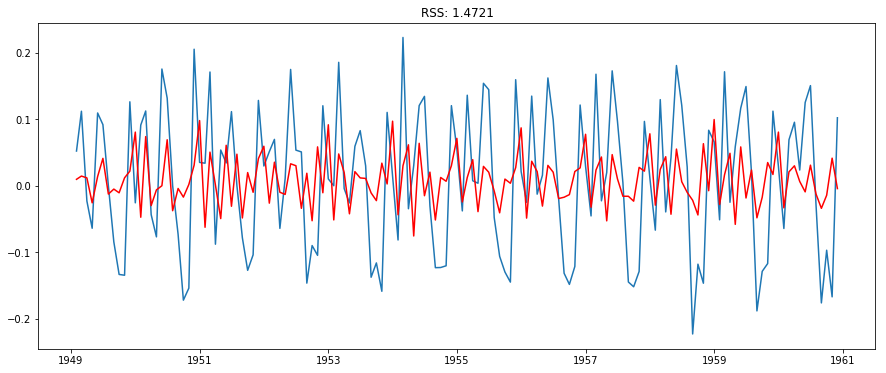

In [164]:
model = ARIMA(ts_log, order=(0, 1, 2))  # (p, d, q)
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

## Combined Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.0292')

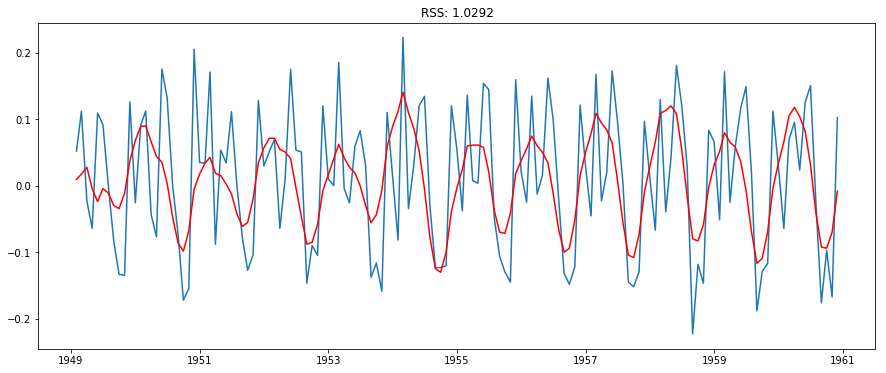

In [165]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Taking it back to original scale

In [167]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [170]:
#The cumulative sum can be found as:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [171]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,'RMSE: 90.1045')

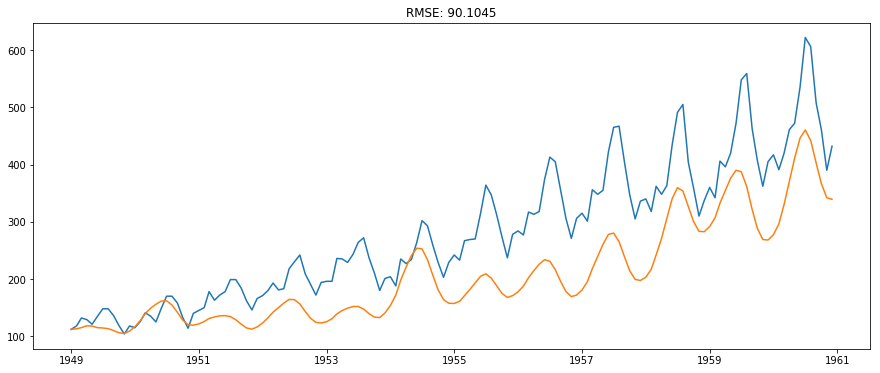

In [172]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))